## Projeto - Séries Temporais

#### Preço por saca de 60kg líquido

Nota: Reais por saca de 60 kg líquido, bica corrida, tipo 6, bebida dura para melhor, valor descontado o Prazo de Pagamento pela taxa CDI, posto na cidade de São Paulo.

https://www.cepea.esalq.usp.br/br/indicador/cafe.aspx

In [1]:
# Manipulação dos Dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística
import statsmodels.api as sm
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

import warnings
warnings.filterwarnings("ignore")

C:\Users\thari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\thari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Importando Modulos

In [2]:
# Funcoes
from Classes.FUNCAO_Limpa_Dados import limpando_dados
from Classes.FUNCAO_Media_Movel import calculo_media_movel
from Classes.FUNCAO_Corrigindo_Inflacao import corrigindo_inflacao

# Classes
from Classes.CLASSE_Teste_Dickey_Fuller import DickeyFuller
from Classes.CLASSE_Acumulando_Inflacao_Diaria import AcumulandoInflacaoDiaria
from Classes.CLASSE_Avaliando_Modelos import AvaliandoModelos

In [3]:
df = pd.read_excel('serie_preco_cafe.xls')

In [4]:
# Aplica função que limpa os dados
df = limpando_dados(df)

In [5]:
df.head(4)

,preco_reais
data,
2016-01-04,496.87
2016-01-05,504.26
2016-01-06,497.49
2016-01-07,496.31


### Iniciando investigação dos dados

#### Plot inicial

Preço apresenta tendência de queda do início até o meio do ano. Essa tendência se reverte e apresenta alta até o fim do ano. Movimento pode ter relação com o momento da colheita. Como explicado abaixo, conforme o ano vai se afastando dos meses de colheita pode existir um aumento de preços.

#### Características da colheita

A colheita de café deve ser feita com os frutos em maturação fisiológica, parecidos com cerejas. Esse estado ocorre entre março e abril até setembro, no período da seca. Nesse momento, a cor da casca do café fica entre o vermelho e o amarelo, e os grãos precisam ter entre 55% e 70% de umidade.

O tempo de colheita após a floração do café é de aproximadamente 7 meses. Há mais de uma floração por ano. Por isso, a colheita se estende por vários meses. No Brasil, o pico de colheita acontece entre junho e agosto.

Diversos fatores interferem na qualidade dos grãos colhidos. Por exemplo, o manejo da lavoura, clima, momento de colheita, beneficiamento, secagem e armazenamento.

Fonte: https://blog.aegro.com.br/colheita-de-cafe

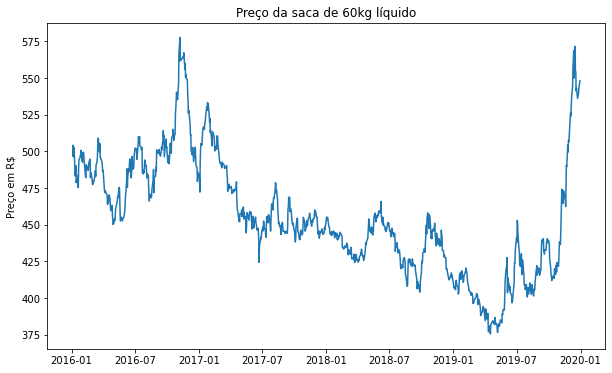

In [6]:
plt.figure(figsize = (10, 6))
plt.plot(df['preco_reais'])
plt.title('Preço da saca de 60kg líquido')
plt.ylabel('Preço em R$')
plt.show();

### Médias móveis

#### Media Movel de 5 dias

In [7]:
media_movel_5dias = calculo_media_movel(df, 'preco_reais', 5)

In [8]:
media_movel_5dias.head(4)

,preco_reais,media_movel,mm_limite_abaixo,mm_limite_acima
data,,,,
2016-01-08,502.60,499.51,484.90,514.12
2016-01-11,483.32,496.80,482.19,511.41
2016-01-12,483.77,492.70,478.09,507.31
2016-01-13,490.33,491.27,476.66,505.88


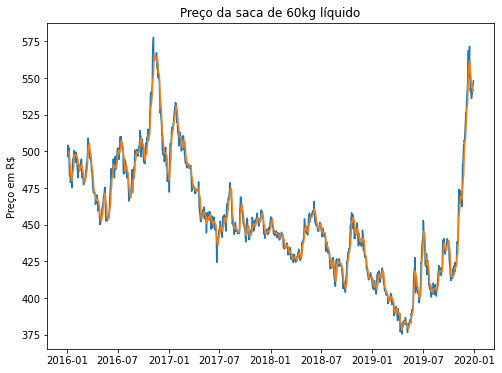

In [9]:
plt.figure(figsize = (8, 6))
plt.plot(df['preco_reais'])
plt.plot(media_movel_5dias['media_movel'])
plt.title('Preço da saca de 60kg líquido')
plt.ylabel('Preço em R$')
plt.show();

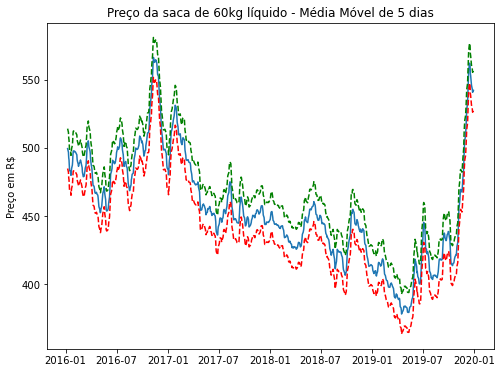

In [10]:
plt.figure(figsize = (8, 6))
plt.plot(media_movel_5dias['media_movel'])
plt.plot(media_movel_5dias['mm_limite_abaixo'], 'r--')
plt.plot(media_movel_5dias['mm_limite_acima'], 'g--')
plt.title('Preço da saca de 60kg líquido - Média Móvel de 5 dias')
plt.ylabel('Preço em R$')
plt.show();

#### Media Movel de 30 dias

In [11]:
media_movel_30dias = calculo_media_movel(df, 'preco_reais', 30)

In [12]:
media_movel_30dias.head(4)

,preco_reais,media_movel,mm_limite_abaixo,mm_limite_acima
data,,,,
2016-02-16,489.23,491.46,445.96,536.96
2016-02-17,487.04,491.13,445.63,536.63
2016-02-18,487.77,490.58,445.08,536.08
2016-02-19,491.55,490.39,444.89,535.89


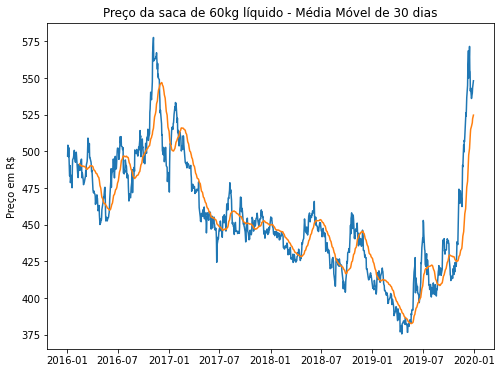

In [13]:
plt.figure(figsize = (8, 6))
plt.plot(df['preco_reais'])
plt.plot(media_movel_30dias['media_movel'])
plt.title('Preço da saca de 60kg líquido - Média Móvel de 30 dias')
plt.ylabel('Preço em R$')
plt.show();

#### Media Móvel de 90 dias

In [14]:
media_movel_90dias = calculo_media_movel(df, 'preco_reais', 90)

In [15]:
media_movel_90dias.head(4)

,preco_reais,media_movel,mm_limite_abaixo,mm_limite_acima
data,,,,
2016-05-12,469.06,482.33,415.06,549.60
2016-05-13,468.37,482.02,414.75,549.29
2016-05-16,475.14,481.69,414.42,548.96
2016-05-17,475.54,481.45,414.18,548.72


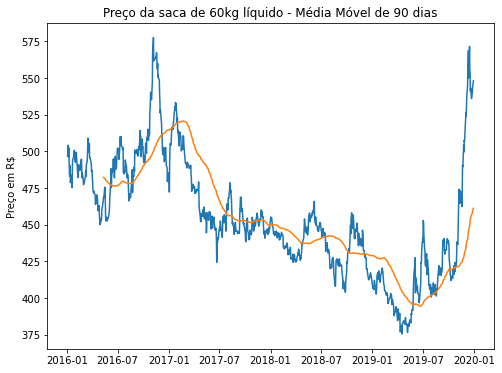

In [16]:
plt.figure(figsize = (8, 6))
plt.plot(df['preco_reais'])
plt.plot(media_movel_90dias['media_movel'])
plt.title('Preço da saca de 60kg líquido - Média Móvel de 90 dias')
plt.ylabel('Preço em R$')
plt.show();

### Dividindo entre dados de treino e teste

75% dos dados serão destinados a treino. 748 observações

25% dos dados serão testados. 249 observações

In [17]:
treino = df.iloc[:749, :]
teste = df.iloc[749:, :]

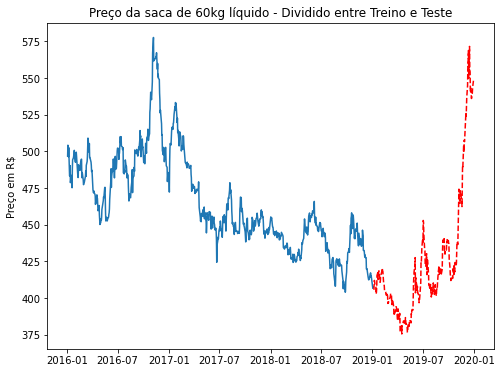

In [18]:
plt.figure(figsize = (8, 6))
plt.plot(treino['preco_reais'])
plt.plot(teste['preco_reais'], 'r--')
plt.title('Preço da saca de 60kg líquido - Dividido entre Treino e Teste')
plt.ylabel('Preço em R$')
plt.show();

### Estacionariedade

#### Avaliando Sazonalidade e Tendência

In [19]:
sazonalidade_trend = seasonal_decompose(treino['preco_reais'], freq = 26)

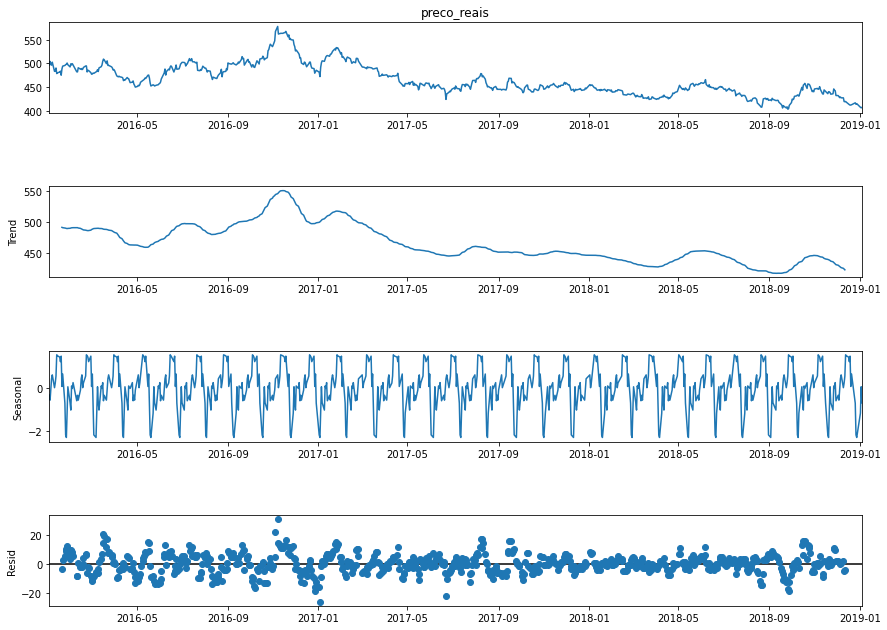

In [20]:
sazo_graph = sazonalidade_trend.plot()
sazo_graph.set_size_inches(14, 10);

#### Testes de Estacionariedade (Dickey-Fuller)

In [21]:
Teste_DF = DickeyFuller(treino['preco_reais'])

In [22]:
Teste_DF.resultados_teste()

Resultados do teste de Dickey-Fuller!
----------------------------------------------------------------------
Valor Dickey-Fuller: -1.7257
p-valor: 0.4179
Lags: 0
Observações: 748
----------------------------------------------------------------------
O valor crítico para um nível de significância de 1% é: -3.4391
O valor crítico para um nível de significância de 5% é: -2.8654
O valor crítico para um nível de significância de 10% é: -2.5688


'Falhamos em rejeitar a hipótese nula! Sem evidência de estacionariedade!'

#### Tornando a série estacionária

Vamos diferenciar a série em um período. Esse é um processo famoso por conseguir tornar uma serié estacionária.

Podemos tentar corrigir pela inflação também.

In [23]:
treino_diferenciado = treino.diff().dropna()
teste_diferenciado = teste.diff().dropna()

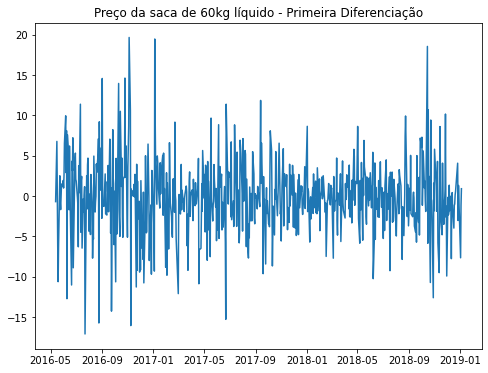

In [24]:
plt.figure(figsize = (8, 6))
plt.plot(treino_diferenciado['preco_reais'])
plt.title('Preço da saca de 60kg líquido - Primeira Diferenciação')
plt.ylabel('')
plt.show();

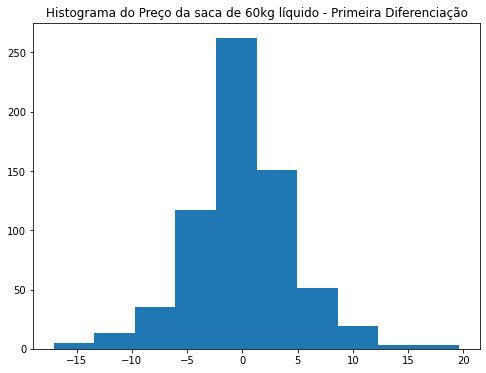

In [25]:
plt.figure(figsize = (8, 6))
plt.hist(treino_diferenciado['preco_reais'])
plt.title('Histograma do Preço da saca de 60kg líquido - Primeira Diferenciação')
plt.ylabel('')
plt.show();

#### Aplicando teste de dickey-fuller na serie diferenciada

In [26]:
Teste_DF_diff = DickeyFuller(treino_diferenciado['preco_reais'])

In [27]:
Teste_DF_diff.resultados_teste()

Resultados do teste de Dickey-Fuller!
----------------------------------------------------------------------
Valor Dickey-Fuller: -25.888
p-valor: 0.0
Lags: 0
Observações: 658
----------------------------------------------------------------------
O valor crítico para um nível de significância de 1% é: -3.4403
O valor crítico para um nível de significância de 5% é: -2.8659
O valor crítico para um nível de significância de 10% é: -2.5691


'Rejeitamos a hipótese nula! Evidência de estacionariedade!'

#### Verificando estacionariedade através do ajuste pela inflação

In [28]:
Inflacao_Diaria = AcumulandoInflacaoDiaria(indice = 'ipca', numero_serie = 433, inicio = '2016-01-01', fim = '2019-12-31')

ValueError: Expected object or value

In [ ]:
df_inflacao_diaria = Inflacao_Diaria.convertendo_inflacao_mensal_para_diaria()

In [ ]:
df_inflacao_diaria.head(4)

In [ ]:
treino = corrigindo_inflacao(treino, df_inflacao_diaria)

In [ ]:
treino.head(6)

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(treino['preco_corrigido'])
plt.title('Preço da saca de 60kg líquido - Deflacionado Preços de 2019')
plt.ylabel('')
plt.show();

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(treino['preco_corrigido'])
plt.title('Histograma do Preço da saca de 60kg líquido - Deflacionado Preços de 2019')
plt.ylabel('')
plt.show();

In [ ]:
Teste_DF_inflacao = DickeyFuller(treino['preco_corrigido'])
Teste_DF_inflacao.resultados_teste()

### Autocorrelação

#### Avaliando a autocorrelação nas séries não estacionárias e estacionárias

#### Série Não Estacionária

In [ ]:
plot_acf(treino['preco_reais'], lags = 30);
plot_pacf(treino['preco_reais'], lags = 30);

#### Série Estacionária

Temos evidência de lags autocorrelacionados de primeira ordem. Além disso no 30º lag temos correlação negativa.

In [ ]:
plot_acf(treino_diferenciado['preco_reais'], lags = 30);
plot_pacf(treino_diferenciado['preco_reais'], lags = 30);

### Iniciando previsões

#### Começando com um modelo simples: Prevendo a partir do último valor

In [30]:
modelo_simples = treino_diferenciado[['preco_reais']]
modelo_simples.columns = ['Real']
modelo_simples['Previsao'] = modelo_simples['Real'].shift()
modelo_simples.dropna(inplace = True)

#### Avaliando em Treino

In [31]:
erro_treino = AvaliandoModelos(modelo_simples['Real'], modelo_simples['Previsao'], nome_col = 'Simples', nome_indice = 'Base Treino')

In [32]:
erro_treino.metricas_avaliacao()

,Simples
Base Treino,
MSE,43.615273
RMSE,6.604186
MAE,4.944498
MAPE,440.441386


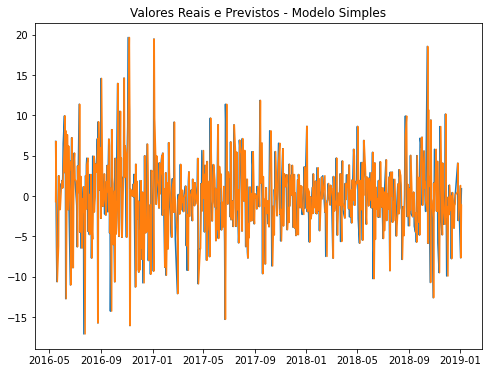

In [35]:
plt.figure(figsize = (8, 6))
plt.plot(modelo_simples['Real'])
plt.plot(modelo_simples['Previsao'])
plt.title('Valores Reais e Previstos - Modelo Simples')
plt.ylabel('')
plt.show();

#### Avaliando em Teste

In [36]:
modelo_simples = teste_diferenciado[['preco_reais']]
modelo_simples.columns = ['Real']
modelo_simples['Previsao'] = modelo_simples['Real'].shift()
modelo_simples.dropna(inplace = True)

In [37]:
erro_teste = AvaliandoModelos(modelo_simples['Real'], modelo_simples['Previsao'], nome_col = 'Simples', nome_indice = 'Base Teste')

In [41]:
erro_teste.metricas_avaliacao()

,Simples
Base Teste,
MSE,66.482980
RMSE,8.153710
MAE,5.585285
MAPE,505.943449


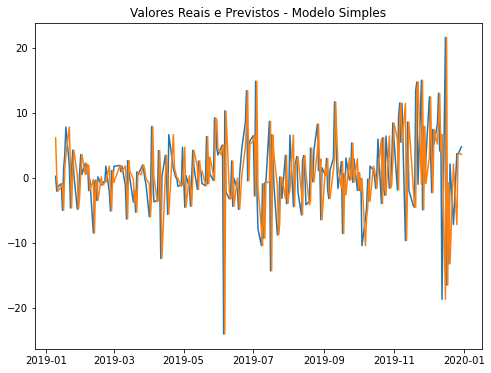

In [42]:
plt.figure(figsize = (8, 6))
plt.plot(modelo_simples['Real'])
plt.plot(modelo_simples['Previsao'])
plt.title('Valores Reais e Previstos - Modelo Simples')
plt.ylabel('')
plt.show();